### 데이터 전처리

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/강의자료/머신러닝기초/2일차_분류

```python
class0_data = pd.read_csv('./datasets/만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./datasets/정회원.csv', index_col=0)
display(class0_data, class1_data)
```

In [3]:
class0_data = pd.read_csv('./datasets/datasets/만료및탈퇴회원.csv', index_col=0)
class1_data = pd.read_csv('./datasets/datasets/정회원.csv', index_col=0)

**분석 목표 : 다음달에 탈퇴하는 회원의 현재달의 징조 파악하기**

```python
## 11월에 탈퇴한 회원의 10월 데이터 - 탈퇴회원 데이터
exit_user = class0_data[class0_data['mm'] == 11]['userid'].unique()
exit_data = class1_data[(class1_data['userid'].isin(exit_user)) & (class1_data['mm'] == 10)]

exit_data['target'] = 'WILL EXIT'

exit_data

```

In [4]:
exit_user = class0_data[class0_data['mm'] == 11]['userid'].unique()
exit_data = class1_data[(class1_data['userid'].isin(exit_user)) & (class1_data['mm'] == 10)] #10월에는 정회원이지만 11월에는 탈퇴하는 회원들의 데이터

exit_data['target'] = 'WILL EXIT'

exit_data

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
3678,00132af0-87d8-4b7e-bbbf-4d67a1accc2b,F,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11,-",15,0,0,...,39.0,64.36,220.0,143.0,2.0,5.0,4.0,2021,10,WILL EXIT
3693,01123b39-b626-4d80-a399-8d424c11b4a0,M,초등,초5,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11",15,0,0,...,14.0,76.00,97.0,75.0,NaN,NaN,NaN,2021,10,WILL EXIT
3717,02300eca-940f-4971-a898-5fb83d3b07ea,F,초등,초1,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",24,0,0,...,9.0,74.89,51.0,37.0,NaN,NaN,NaN,2021,10,WILL EXIT
3719,0248e2ee-9ecb-48f8-9658-67fd41d99b24,M,초등,초3,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-",19,0,0,...,36.0,43.22,196.0,92.0,NaN,NaN,NaN,2021,10,WILL EXIT
3742,03411e28-b8e4-419d-aae0-b9809ed60402,M,초등,초5,11,학습생(정),"-,11,-,11,-",29,0,0,...,8.0,75.38,49.0,37.0,NaN,NaN,NaN,2021,10,WILL EXIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97036,1225f6fc-204b-469e-a9c2-2c5f7f360747,F,초등,초2,11,학습생(정),11,0,0,0,...,28.0,84.18,105.0,97.0,NaN,NaN,NaN,2022,10,WILL EXIT
97042,124dbcb9-76ca-4d47-ae35-e53fff3cc1ff,M,초등,초5,11,학습생(정),"55,11",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,10,WILL EXIT
97204,1aafd5a8-b056-4361-8649-fb4820797965,M,초등,초3,11,학습생(정),11,0,0,0,...,48.0,62.58,247.0,143.0,3.0,11.0,8.0,2022,10,WILL EXIT
97285,1dc2e28a-b2c4-462b-83cb-98fdddfabf21,M,초등,초6,11,학습생(정),11,0,0,0,...,2.0,20.00,10.0,2.0,NaN,NaN,NaN,2022,10,WILL EXIT


```python
## 11월에 정회원인 회원의 10월 데이터 - 정회원 데이터
regular_user = class1_data[class1_data['mm'] == 11]['userid'].unique()
regular_data = class1_data[(class1_data['userid'].isin(regular_user)) & (class1_data['mm'] == 10)]

regular_data['target'] = 'WILL STAY'

regular_data
```

In [5]:
regular_user = class1_data[class1_data['mm'] == 11]['userid'].unique()
regular_data = class1_data[(class1_data['userid'].isin(regular_user)) & (class1_data['mm'] == 10)]

regular_data['target'] = 'WILL STAY'

regular_data

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
26901,000213f1-0f58-48d6-bcb3-3c15864b7d5a,M,초등,초4,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-,11,-,11",20,0,0,...,19.0,46.89,99.0,33.0,1.0,15.0,13.0,2021,10,WILL STAY
26902,0006cc87-557b-4ee7-8604-8b3afa86a31c,F,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",11,0,0,...,28.0,79.57,170.0,132.0,7.0,7.0,7.0,2021,10,WILL STAY
26903,001ef835-25e0-4f2a-9aa8-4aa2bad7a3dc,M,초등,초4,11,학습생(정),"-,11,-,11,-,11,-,11,-,11,-,11,-",22,0,0,...,17.0,66.35,104.0,74.0,NaN,NaN,NaN,2021,10,WILL STAY
26904,001f9510-f994-4516-b77d-d8a1bf181289,F,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-",7,0,0,...,71.0,90.35,446.0,393.0,21.0,26.0,26.0,2021,10,WILL STAY
26905,00203c3e-dd28-450d-b2d6-b6959dc81d04,M,초등,초3,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",14,0,0,...,35.0,77.09,243.0,191.0,3.0,9.0,9.0,2021,10,WILL STAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58117,ffba3c0f-5af8-4fa5-9b3b-2c2e432dedc3,F,초등,초2,11,학습생(정),"11,-,11,-,11,-,11,-,11,-",11,0,0,...,26.0,72.19,152.0,106.0,NaN,NaN,NaN,2021,10,WILL STAY
58118,ffc0b882-6280-44c5-b11e-1147e1bf6e0f,F,초등,초3,11,학습생(정),"-,11,-,11,-,11,-,11,-",25,0,0,...,16.0,74.00,120.0,93.0,6.0,6.0,6.0,2021,10,WILL STAY
58119,ffc0cb97-b4e9-4a19-8f07-e5c5870a6f5a,M,초등,초1,11,학습생(정),"-,11,-,11,-,11,-,11,-,11",9,0,0,...,46.0,79.85,270.0,216.0,NaN,NaN,NaN,2021,10,WILL STAY
58120,ffcae717-8d1e-4055-be25-24a907f7397c,M,초등,초6,11,학습생(정),"11,-,11,-,11,-,11,-,11,-,11,-",7,0,0,...,13.0,81.08,80.0,67.0,NaN,NaN,NaN,2021,10,WILL STAY


```python
dataset = pd.concat([exit_data, regular_data])
```

In [7]:
dataset = pd.concat([exit_data, regular_data])

```python
dataset['target'].value_counts()
```

In [8]:
dataset['target'].value_counts()

WILL STAY    4128
WILL EXIT    1251
Name: target, dtype: int64

```python
dataset = dataset.dropna(subset = ['point_gain_activeday_count', 'point_gain_count', 'point_gain',
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ])
```

In [9]:
dataset = dataset.dropna(subset = ['point_gain_activeday_count', 'point_gain_count', 'point_gain',
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ])

```python
X = dataset[['point_gain_activeday_count', 'point_gain_count', 'point_gain',
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ]]
```

In [10]:
X = dataset[['point_gain_activeday_count', 'point_gain_count', 'point_gain',
             'point_loss_activeday_count', 'point_loss_count', 'point_loss',
             'tablet_activeday_count', 'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
             'tablet_login_count', 'tablet_logout_count', 'study_activeday_count', 'study_count',
             'study_notcompleted_count', 'study_completed_count',
             'study_restart_count', 'total_system_learning_time', 'total_caliper_learning_time',
             'media_activeday_count', 'media_count',
             'video_action_count', 'video_start_count', 'video_restart_count',
             'video_pause_count', 'video_jump_count', 'video_resume_count',
             'video_speed_count', 'video_volume_count', 'video_end_count',
             'test_activeday_count', 'test_count', 'test_average_score',
             'test_item_count', 'test_correct_count', 'wrong_count',
             'wrong_item_count', 'wrong_correct_count'
             ]]

```python
Y = dataset['target']
```

In [15]:
Y = dataset['target']
Y

3678     WILL EXIT
3766     WILL EXIT
3779     WILL EXIT
3809     WILL EXIT
3822     WILL EXIT
           ...    
58111    WILL STAY
58113    WILL STAY
58115    WILL STAY
58116    WILL STAY
58118    WILL STAY
Name: target, Length: 3280, dtype: object

In [16]:
# 유지-0, 이탈-1  
Y = Y.apply(lambda x: 0 if x=='WILL STAY' else 1)

In [23]:
Y.value_counts()

0    2694
1     586
Name: target, dtype: int64

```python
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
```

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

### 모델 적용

#### Bagging(배깅)

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측.
bagging_clf.fit(X_train , y_train)
pred = bagging_clf.predict(X_test)
```

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
lr_clf = LogisticRegression(solver='liblinear')

bagging_clf = BaggingClassifier(base_estimator=lr_clf)

# BaggingClassifier 학습/예측.
bagging_clf.fit(X_train , y_train)
pred = bagging_clf.predict(X_test)

In [36]:
y_test

56536    0
27608    0
36645    0
56946    0
56385    1
        ..
56579    0
57899    0
23238    1
27771    0
6913     1
Name: target, Length: 656, dtype: int64

In [37]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

```python
# 평가
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Bagging 분류기 정확도: {0:.4f}'.format(accuracy))
print('Bagging 분류기 Recall: {0:.4f}'.format(recall))
print('Bagging 분류기 Precision: {0:.4f}'.format(precision))
print('Bagging 분류기 AUC: {0:.4f}'.format(auc))
print('Bagging 분류기 Confusion Matrix:','\n', matrix)
```

In [38]:
# 평가
accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('Bagging 분류기 정확도: {0:.4f}'.format(accuracy))
print('Bagging 분류기 Recall: {0:.4f}'.format(recall))
print('Bagging 분류기 Precision: {0:.4f}'.format(precision))
print('Bagging 분류기 AUC: {0:.4f}'.format(auc))
print('Bagging 분류기 Confusion Matrix:','\n', matrix)

Bagging 분류기 정확도: 0.8308
Bagging 분류기 Recall: 0.0092
Bagging 분류기 Precision: 0.2500
Bagging 분류기 AUC: 0.5018
Bagging 분류기 Confusion Matrix: 
 [[544   3]
 [108   1]]


```python
# 개별 모델의 학습/예측/평가.
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
class_name= lr_clf.__class__.__name__

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('{0} 정확도: {1:.4f}'.format(class_name, accuracy))
print('{0} Recall: {1:.4f}'.format(class_name, recall))
print('{0} Precision: {1:.4f}'.format(class_name, precision))
print('{0} AUC: {1:.4f}'.format(class_name, auc))
print('{0} Confusion Matrix:'.format(class_name),'\n', matrix)
```


In [22]:
# 개별 모델의 학습/예측/평가.
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
class_name= lr_clf.__class__.__name__

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('{0} 정확도: {1:.4f}'.format(class_name, accuracy))
print('{0} Recall: {1:.4f}'.format(class_name, recall))
print('{0} Precision: {1:.4f}'.format(class_name, precision))
print('{0} AUC: {1:.4f}'.format(class_name, auc))
print('{0} Confusion Matrix:'.format(class_name),'\n', matrix)

LogisticRegression 정확도: 0.7942
LogisticRegression Recall: 0.0000
LogisticRegression Precision: 0.0000
LogisticRegression AUC: 0.4981
LogisticRegression Confusion Matrix: 
 [[521   2]
 [133   0]]


#### 랜덤 포레스트

```python
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
print('랜덤 포레스트 Recall: {0:.4f}'.format(recall))
print('랜덤 포레스트 Precision: {0:.4f}'.format(precision))
print('랜덤 포레스트 AUC: {0:.4f}'.format(auc))
print('랜덤 포레스트 Confusion Matrix:','\n', matrix)
```

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
matrix = confusion_matrix(y_test, pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
print('랜덤 포레스트 Recall: {0:.4f}'.format(recall))
print('랜덤 포레스트 Precision: {0:.4f}'.format(precision))
print('랜덤 포레스트 AUC: {0:.4f}'.format(auc))
print('랜덤 포레스트 Confusion Matrix:','\n', matrix)

랜덤 포레스트 정확도: 0.7881
랜덤 포레스트 Recall: 0.0000
랜덤 포레스트 Precision: 0.0000
랜덤 포레스트 AUC: 0.4943
랜덤 포레스트 Confusion Matrix: 
 [[517   6]
 [133   0]]


```python
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]
```

In [25]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]

point_gain                     0.070076
tablet_moved_menu_count        0.046554
point_gain_count               0.045218
total_system_learning_time     0.042270
test_correct_count             0.041380
test_average_score             0.039051
study_restart_count            0.036375
video_action_count             0.034002
media_count                    0.033986
study_completed_count          0.032968
total_caliper_learning_time    0.029696
test_activeday_count           0.027710
wrong_item_count               0.027095
point_gain_activeday_count     0.027011
test_item_count                0.026982
tablet_leave_count             0.026432
video_end_count                0.026332
video_jump_count               0.026238
study_activeday_count          0.025940
study_count                    0.024848
dtype: float64

```python
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()
```

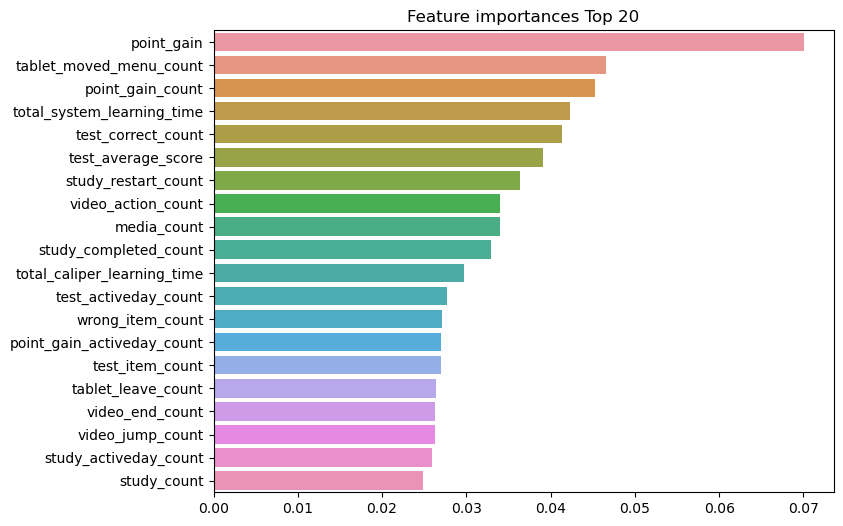

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### 그래디언트 부스팅

```python
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test , gb_pred)
recall = recall_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
auc = roc_auc_score(y_test, gb_pred)
matrix = confusion_matrix(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(accuracy))
print('GBM Recall: {0:.4f}'.format(recall))
print('GBM Precision: {0:.4f}'.format(precision))
print('GBM AUC: {0:.4f}'.format(auc))
print('GBM Confusion Matrix:','\n', matrix)

print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))
```

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test , gb_pred)
recall = recall_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
auc = roc_auc_score(y_test, gb_pred)
matrix = confusion_matrix(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(accuracy))
print('GBM Recall: {0:.4f}'.format(recall))
print('GBM Precision: {0:.4f}'.format(precision))
print('GBM AUC: {0:.4f}'.format(auc))
print('GBM Confusion Matrix:','\n', matrix)

print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.7805
GBM Recall: 0.0150
GBM Precision: 0.1333
GBM AUC: 0.4951
GBM Confusion Matrix: 
 [[510  13]
 [131   2]]
GBM 수행 시간: 1.6 초 
